## Softmax Classification
    Multinomial classification

- hypothesis = tf.nn.softmax(tf.matmul(X,W)+b)

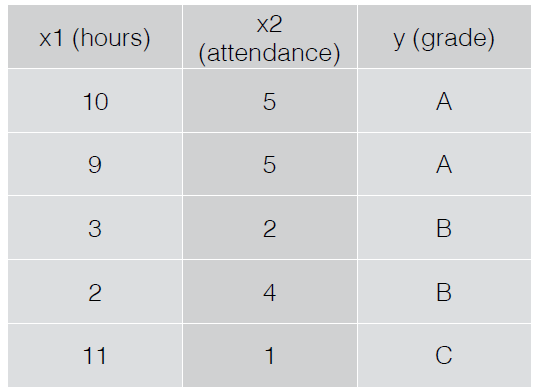

In [2]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)

x_data = [[10, 5], [9, 5], [3, 2], [2, 4], [11, 1]]
y_data = [[1, 0, 0],
          [1, 0, 0],
          [0, 1, 0],
          [0, 1, 0],
          [0, 0, 1]]

X = tf.placeholder('float', [None, 2])
Y = tf.placeholder('float', [None, 3])
nb_classes = 3

W = tf.Variable(tf.random_normal([2, nb_classes]), name = 'weight')
b = tf.Variable(tf.random_normal([nb_classes]), name = 'bias')

hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis = 1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1).minimize(cost)

In [5]:
from tqdm import tqdm_notebook
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in tqdm_notebook(range(2001)):
    sess.run(optimizer, feed_dict = {X: x_data, Y: y_data})
    if step % 200 == 0:
        print('Step : {}, \n Cost : {}'.format(step, sess.run(cost,
                                                             feed_dict ={X: x_data,
                                                                        Y: y_data})))

Step : 0, 
 Cost : 5.66846227645874
Step : 200, 
 Cost : 0.07845985889434814
Step : 400, 
 Cost : 0.0450439453125
Step : 600, 
 Cost : 0.0318208783864975
Step : 800, 
 Cost : 0.024630513042211533
Step : 1000, 
 Cost : 0.02009696327149868
Step : 1200, 
 Cost : 0.016974376514554024
Step : 1400, 
 Cost : 0.014691990800201893
Step : 1600, 
 Cost : 0.01295076310634613
Step : 1800, 
 Cost : 0.011578544974327087
Step : 2000, 
 Cost : 0.010469244793057442



In [6]:
# Testing & One-hot encoding
test_data = [[9.5, 5.5], 
             [9.9, 1.5], 
             [3.1, 2.1]]

pred_val = sess.run(hypothesis, feed_dict={X: test_data})
pred_idx = sess.run(tf.argmax(pred_val, 1))

# print("predict value : \n {} \n\npredict index : {}".format(pred_val, pred_idx))
print("test data : {} \n\npredict value : \n {} \n\npredict index : {}".format(test_data, pred_val, pred_idx))

test data : [[9.5, 5.5], [9.9, 1.5], [3.1, 2.1]] 

predict value : 
 [[9.9176484e-01 8.2011176e-03 3.4045257e-05]
 [2.3200342e-02 3.5185465e-07 9.7679931e-01]
 [3.2231383e-02 9.6332335e-01 4.4453098e-03]] 

predict index : [0 2 1]


In [7]:
# grade로 예측값 표기
grade = ['A', 'B', 'C']
arg_val = sess.run(tf.arg_max(pred_val, 1))
p_grade = [ grade[val] for val in arg_val ]
print(p_grade)

W0911 15:07:09.462388  9748 deprecation.py:323] From <ipython-input-7-93abe8ccf7f2>:3: arg_max (from tensorflow.python.ops.gen_math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.math.argmax` instead


['A', 'C', 'B']


## 좀더 복잡한 Classification

In [8]:
import tensorflow as tf

tf.set_random_seed(777)  # for reproducibility

x_data = [[1, 2, 1, 1], 
          [2, 1, 3, 2], 
          [3, 1, 3, 4], 
          [4, 1, 5, 5],
          [1, 7, 5, 5], 
          [1, 2, 5, 6], 
          [1, 6, 6, 6], 
          [1, 7, 7, 7]]

y_data = [[0, 0, 1], 
          [0, 0, 1], 
          [0, 0, 1], 
          [0, 1, 0],
          [0, 1, 0], 
          [0, 1, 0], 
          [1, 0, 0], 
          [1, 0, 0]]

X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 3])
nb_classes = 3

W = tf.Variable(tf.random_normal([4, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [9]:
# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in tqdm_notebook(range(2001)):
    sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
    if step % 200 == 0:
        # print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}))
        print("Step : {}, \t Cost : {}".format(step, sess.run(cost, feed_dict={X: x_data, Y: y_data})))

Step : 0, 	 Cost : 4.675660133361816
Step : 200, 	 Cost : 0.7019641399383545
Step : 400, 	 Cost : 0.5862798690795898
Step : 600, 	 Cost : 0.49409955739974976
Step : 800, 	 Cost : 0.4050877094268799
Step : 1000, 	 Cost : 0.3157208561897278
Step : 1200, 	 Cost : 0.23839755356311798
Step : 1400, 	 Cost : 0.21483218669891357
Step : 1600, 	 Cost : 0.19635960459709167
Step : 1800, 	 Cost : 0.1806877702474594
Step : 2000, 	 Cost : 0.16723886132240295



In [10]:
# Testing & One-hot encoding
a = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9]]})
print(a, '\n예측값 :', sess.run(tf.arg_max(a, 1)))

[[1.4414038e-02 9.8557371e-01 1.2197415e-05]] 
예측값 : [1]


In [11]:
b = sess.run(hypothesis, feed_dict={X: [[1, 3, 4, 3]]})
print(b, '\n예측값 :', sess.run(tf.arg_max(b, 1)))

[[0.7790343  0.19482502 0.02614059]] 
예측값 : [0]


In [12]:
c = sess.run(hypothesis, feed_dict={X: [[1, 1, 0, 1]]})
print(c, '\n예측값 :', sess.run(tf.arg_max(c, 1)))

[[3.0277356e-08 4.4573797e-04 9.9955422e-01]] 
예측값 : [2]


In [13]:
all = sess.run(hypothesis, feed_dict={
               X: [[1, 11, 7, 9], [1, 3, 4, 3], [1, 1, 0, 1]]})
print(all, '\n\n예측값 :', sess.run(tf.arg_max(all, 1)))

[[1.4414038e-02 9.8557371e-01 1.2197415e-05]
 [7.7903432e-01 1.9482502e-01 2.6140589e-02]
 [3.0277356e-08 4.4573797e-04 9.9955422e-01]] 

예측값 : [1 0 2]


## Animal classification with softmax_cross_entropy_with_logits

- Ref : https://kr.pinterest.com/explore/animal-classification-activity/?lp=true
- Data : https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data

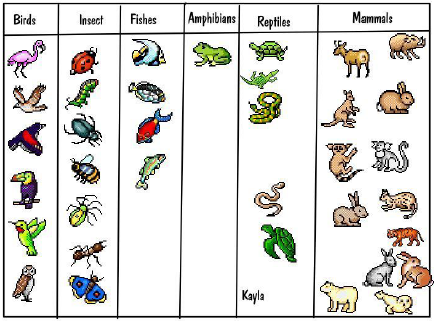

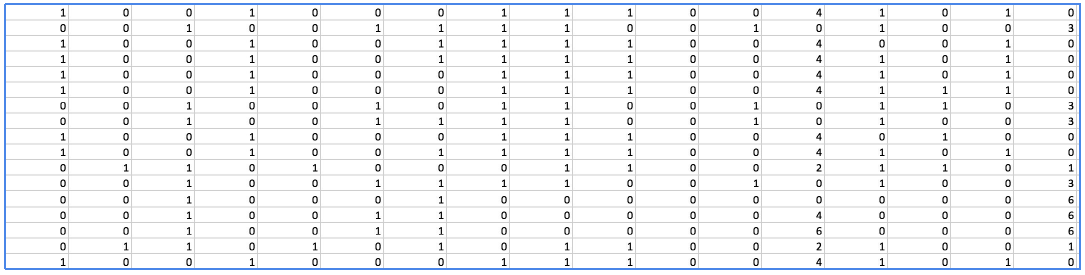

In [15]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility

# Predicting animal type based on various features
xy = np.loadtxt('data-04-zoo.csv', delimiter=',', dtype=np.float32)

x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, y_data.shape)
print('\nx_data :\n', x_data)
print('\ny_data :\n', y_data)

nb_classes = 7  # 0 ~ 6

X = tf.placeholder(tf.float32, [None, 16])
Y = tf.placeholder(tf.int32, [None, 1])  # 0 ~ 6

Y_one_hot = tf.one_hot(Y, nb_classes)  # one hot
print("\none_hot", Y_one_hot)

Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])
print("\nreshape", Y_one_hot)

W = tf.Variable(tf.random_normal([16, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

# Cross entropy cost/loss
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits,
                                                 labels=Y_one_hot)
cost = tf.reduce_mean(cost_i)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

(101, 16) (101, 1)

x_data :
 [[1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 1. 0. 1.]
 [0. 0. 1. ... 1. 0. 0.]
 ...
 [1. 0. 0. ... 1. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 1. 0. 0.]]

y_data :
 [[0.]
 [0.]
 [3.]
 [0.]
 [0.]
 [0.]
 [0.]
 [3.]
 [3.]
 [0.]
 [0.]
 [1.]
 [3.]
 [6.]
 [6.]
 [6.]
 [1.]
 [0.]
 [3.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [5.]
 [4.]
 [4.]
 [0.]
 [0.]
 [0.]
 [5.]
 [0.]
 [0.]
 [1.]
 [3.]
 [0.]
 [0.]
 [1.]
 [3.]
 [5.]
 [5.]
 [1.]
 [5.]
 [1.]
 [0.]
 [0.]
 [6.]
 [0.]
 [0.]
 [0.]
 [0.]
 [5.]
 [4.]
 [6.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [3.]
 [3.]
 [2.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [6.]
 [3.]
 [0.]
 [0.]
 [2.]
 [6.]
 [1.]
 [1.]
 [2.]
 [6.]
 [3.]
 [1.]
 [0.]
 [6.]
 [3.]
 [1.]
 [5.]
 [4.]
 [2.]
 [2.]
 [3.]
 [0.]
 [0.]
 [1.]
 [0.]
 [5.]
 [0.]
 [6.]
 [1.]]

one_hot Tensor("one_hot:0", shape=(?, 1, 7), dtype=float32)

reshape Tensor("Reshape:0", shape=(?, 7), dtype=float32)


W0911 15:19:40.896467  9748 deprecation.py:323] From <ipython-input-15-b2a8316c1083>:37: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [16]:
# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(2000):
    sess.run(optimizer, feed_dict={X: x_data, Y: y_data})
    if step % 100 == 0:
        loss, acc = sess.run([cost, accuracy], feed_dict={
                             X: x_data, Y: y_data})
        print("Step: {:5}, \t Loss: {:.3f}, \t Acc: {:.2%}".format(
            step, loss, acc))

Step:     0, 	 Loss: 6.066, 	 Acc: 2.97%
Step:   100, 	 Loss: 0.683, 	 Acc: 79.21%
Step:   200, 	 Loss: 0.455, 	 Acc: 89.11%
Step:   300, 	 Loss: 0.353, 	 Acc: 91.09%
Step:   400, 	 Loss: 0.286, 	 Acc: 94.06%
Step:   500, 	 Loss: 0.238, 	 Acc: 96.04%
Step:   600, 	 Loss: 0.203, 	 Acc: 97.03%
Step:   700, 	 Loss: 0.176, 	 Acc: 97.03%
Step:   800, 	 Loss: 0.155, 	 Acc: 98.02%
Step:   900, 	 Loss: 0.138, 	 Acc: 98.02%
Step:  1000, 	 Loss: 0.124, 	 Acc: 99.01%
Step:  1100, 	 Loss: 0.113, 	 Acc: 99.01%
Step:  1200, 	 Loss: 0.103, 	 Acc: 99.01%
Step:  1300, 	 Loss: 0.095, 	 Acc: 99.01%
Step:  1400, 	 Loss: 0.088, 	 Acc: 99.01%
Step:  1500, 	 Loss: 0.082, 	 Acc: 99.01%
Step:  1600, 	 Loss: 0.077, 	 Acc: 99.01%
Step:  1700, 	 Loss: 0.072, 	 Acc: 100.00%
Step:  1800, 	 Loss: 0.068, 	 Acc: 100.00%
Step:  1900, 	 Loss: 0.064, 	 Acc: 100.00%


In [17]:
# Let's see if we can predict
pred = sess.run(prediction, feed_dict={X: x_data})

# y_data: (N,1) = flatten => (N, ) matches pred.shape
for p, y in zip(pred, y_data.flatten()):
    print("[{}]  Prediction : {},  True Y : {}".format(p == int(y), p, int(y)))
    # print("[{}]  Prediction : {},  True Y : {}, y_data : {}".format(p == int(y), p, int(y), y_data))

[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 3,  True Y : 3
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 3,  True Y : 3
[True]  Prediction : 3,  True Y : 3
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 1,  True Y : 1
[True]  Prediction : 3,  True Y : 3
[True]  Prediction : 6,  True Y : 6
[True]  Prediction : 6,  True Y : 6
[True]  Prediction : 6,  True Y : 6
[True]  Prediction : 1,  True Y : 1
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 3,  True Y : 3
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 1,  True Y : 1
[True]  Prediction : 1,  True Y : 1
[True]  Prediction : 0,  True Y : 0
[True]  Prediction : 1,  True Y : 1
[True]  Prediction : 5,  True Y : 5
[True]  Prediction : 4,  True Y : 4
[True]  Prediction : 4,  True Y : 4
[True]  Prediction : 0,  Tru